# Überschrift Finden!!!
Autor: Emirhan Igci
Datum: 23.04.2025

# Vorwort
Für die verwendete ck

# Agenda <a class="anchor" id="Agenda"></a>
  1. [Einleitung und Zielsetzung](#EinleitungundZielsetzung)
  1.1 [Einleitung und Zielsetzung](#EinleitungundZielsetzung)


# Einleitung und Zielsetzung <a class="anchor" id="EinleitungundZielsetzung"></a>

In der nachfolgenden Analyse werden **Immobilienpreise**, sowie **Mietpreise** auf Grundlage verschiedenster Einflussfaktoren analysiert.

Dabei werden folgende Hauptthesen untersucht:

Themen der Untersuchung:
1. Auswirkung der Barrierefreiheit von Immobilien und Wohnungen auf den Verkaufs- oder Mietpreis
2. Auswirkung der Region auf den Verkaufs- oder Mietpreis

Ziele:
1. Erstellen eines Modells, einer Funktion zur Kaufentscheidung der Immobilie basierend auf Kredit, eigenkapital und weiteren Faktoren

Innerhalb der Bearbeitung können auch weitere Thesen untersucht werden, welche nach einem bessern Verständnis über den Datensatz entstehen könnten.


In [18]:
import sys
from sys import displayhook
# sys.executable adressiert die Python-Installation von Jupyter
! {sys.executable} -m pip install dmba seaborn numpy pandas


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\emirh\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# Explorative Datenanalyse

## Quelle
Die Quelle der Immobilien wurde durch die FDZ Ruhr bereitgestellt und durch das RWI - Leibnitz-Institut für Wirtschaft nochmals angepasst.
Es gibt zwei Dateitypen:

Die **Panel-Campus-Datei** umfasst Inserate aus den 15 größten deutschen Städten (alle mit mindestens rund 500 000 Einwohnern, darunter Berlin, Hamburg, München bis Duisburg). Für jede Stadt wird pro Kalenderjahr eine ähnlich große Zufallsstichprobe gezogen: Bei Haus-Verkäufen sind es etwa 1 000 Anzeigen pro Jahr, bei Mietwohnungen in Berlin oder Leipzig können es bis zu 50 000 sein. Insgesamt entfallen ungefähr 27 % der Datensätze auf Wohnungs-Verkäufe und 37 % auf Haus-Verkäufe und Mietwohnungen. Berücksichtigt werden nur Inserate, die bestimmte Qualitätskriterien erfüllen (kaum Fehlwerte, keine Ausreißer).

Die **Cross-Sectional-Campus-Datei** enthält eine bundesweite Stichprobe aus dem Jahr 2023. Grundlage sind alle Inserate, die in diesem Jahr mindestens einen Tag online waren; berücksichtigt wird jeweils nur der letzte Spell einer Anzeige. Für Gemeinden mit weniger als 50 Inseraten wird lediglich die Kreisebene ausgewiesen, wobei höchstens 100 Anzeigen pro Kreis gezogen werden. Anschließend wird abhängig von der Gesamtzahl der verfügbaren Datensätze eine Stichprobe von 50, 200, 1 000 oder 5 000 Beobachtungen gebildet.

Insgesamt gibt es daher 6 Dateien (Dateityp x Asschreibungstyp) (2x3):
* Panel: Datendatei für Hausverkäufe (HK_cities)
* Panel: Datendatei für Wohnungsverkäufe (WK_cities)
* Panel: Datendatei für Mietangebote (WM_cities)
* Cross-Sectional: Datendatei für Hausverkäufe (HK_2023)
* Cross-Sectional: Datendatei für Wohnungsverkäufe (WK_2023)
* Cross-Sectional: Datendatei für Mietangebote (WM_2023)

## Beschreibung der Variablen
Die Beschreibung der Variablen orientiert sich an einer bereits vorhandenen Dokumentation der Quelle, in welcher die gesamten Variablen auf Englisch beschrieben wurden. Daher werden die Beschreibungen mithilfe von KI übersetzt und verwendet. Die Richtigkeit der Übersetzung wird manuell überprüft.


| #  | Attribut                        | Beschreibung                         | Datentyp   | Skalierung/Einheit | Typ (DS) |
| -- | ------------------------------- | ------------------------------------ | ---------- | ------------------ | -------- |
| 1  | **obid**                        | Eindeutige künstliche Objekt-ID      | numerisch  | –                  | HS/AS/AR |
| 2  | **adat**                        | Startmonat der Anzeige (JJMM)        | numerisch  | Monat              | HS/AS/AR |
| 3  | **edat**                        | Endmonat der Anzeige (JJMM)          | numerisch  | Monat              | HS/AS/AR |
| 4  | **aufzug**                      | Aufzug vorhanden                     | numerisch  | 0 / 1              | AS/AR    |
| 5  | **ausstattung**                 | Kodierte Ausstattungskategorie       | numerisch  | –                  | HS/AS/AR |
| 6  | **badezimmer**                  | Anzahl der Badezimmer                | numerisch  | Anzahl             | HS/AS/AR |
| 7  | **balkon**                      | Balkon vorhanden                     | numerisch  | 0 / 1              | AS/AR    |
| 8  | **denkmalobjekt**               | Denkmalgeschützt                     | numerisch  | 0 / 1              | HS/AS    |
| 9  | **einbaukueche**                | Einbauküche vorhanden                | numerisch  | 0 / 1              | HS/AS/AR |
| 10 | **etage**                       | Lage­etage der Wohnung               | numerisch  | Etage              | AS/AR    |
| 11 | **ferienhaus**                  | Als Ferienobjekt nutzbar             | numerisch  | 0 / 1              | AS       |
| 12 | **gaestewc**                    | Gäste-WC vorhanden                   | numerisch  | 0 / 1              | HS/AS/AR |
| 13 | **garten**                      | (Mit-)Nutzung Garten                 | numerisch  | 0 / 1              | HS/AS/AR |
| 14 | **haustier\_erlaubt**           | Haustiere erlaubt                    | numerisch  | 0 / 1              | HS/AS/AR |
| 15 | **kategorie\_Haus**             | Haus-Typ-Kategorie (Reihenhaus … )   | numerisch  | –                  | HS/AS/AR |
| 16 | **keller**                      | Keller vorhanden                     | numerisch  | 0 / 1              | HS/AS/AR |
| 17 | **parkplatz**                   | Stellplatz / Garage verfügbar        | numerisch  | 0 / 1              | HS/AS/AR |
| 18 | **zimmeranzahl**                | Anzahl Zimmer (½ Zimmer möglich)     | numerisch  | Anzahl             | HS/AS/AR |
| 19 | **anzahletagen**                | Anzahl Stockwerke des Gebäudes       | numerisch  | Anzahl             | HS/AS    |
| 20 | **bauphase**                    | Bauphase (Bestand, im Bau … )        | numerisch  | –                  | HS/AS/AR |
| 21 | **einliegerwohnung**            | Einliegerwohnung vorhanden           | numerisch  | 0 / 1              | HS/AS    |
| 22 | **foerderung**                  | Öffentlich gefördert / WBS nötig     | numerisch  | 0 / 1              | AR       |
| 23 | **immobilientyp**               | Immobilienart (Haus, Whg. … )        | numerisch  | –                  | HS/AS/AR |
| 24 | **kaufvermietet**               | Objekt wird vermietet verkauft       | numerisch  | 0 / 1              | HS/AS    |
| 25 | **mieteinnahmenpromonat**       | Ist-Mieteinnahmen (Verkauf)          | numerisch  | EUR / Monat        | HS/AS    |
| 26 | **nebenraeume**                 | Anzahl Nebenräume                    | numerisch  | Anzahl             | HS/AS/AR |
| 27 | **rollstuhlgerecht**            | Barrierefreier / stufenloser Zugang  | numerisch  | 0 / 1              | HS/AS/AR |
| 28 | **schlafzimmer**                | Anzahl Schlafzimmer                  | numerisch  | Anzahl             | HS/AS/AR |
| 29 | **wohngeld**                    | Haus-/ Wohngeld                      | numerisch  | EUR / Monat        | AS       |
| 30 | **grundstuecksflaeche**         | Grundstücksfläche                    | numerisch  | m²                 | HS/AS    |
| 31 | **nutzflaeche**                 | Nutzfläche                           | numerisch  | m²                 | HS/AS/AR |
| 32 | **wohnflaeche**                 | Wohnfläche                           | string     | m²                 | HS/AS/AR |
| 33 | **baujahr**                     | Baujahr des Gebäudes                 | numerisch  | Jahr               | HS/AS/AR |
| 34 | **energieausweistyp**           | Typ des Energieausweises             | numerisch  | –                  | HS/AS/AR |
| 35 | **energieeffizienzklasse**      | Energieeffizienzklasse (A+ … H)      | numerisch  | –                  | HS/AS/AR |
| 36 | **ev\_kennwert**                | Endenergieverbrauch                  | numerisch  | kWh / m² a         | HS/AS/AR |
| 37 | **ev\_wwenthalten**             | Warmwasser im Kennwert enthalten     | numerisch  | 0 / 1              | HS/AS/AR |
| 38 | **heizkosten**                  | Monatliche Heizkosten                | numerisch  | EUR / Monat        | AR       |
| 39 | **heizungsart**                 | Heizungsart (Zentral … )             | numerisch  | –                  | HS/AS/AR |
| 40 | **letzte\_modernisierung**      | Jahr der letzten Modernisierung      | numerisch  | Jahr               | HS/AS/AR |
| 41 | **objektzustand**               | Objektzustand (Code)                 | numerisch  | –                  | HS/AS/AR |
| 42 | **kaufpreis**                   | Angebotskaufpreis                    | numerisch  | EUR                | HS/AS    |
| 43 | **mietekalt**                   | Nettokaltmiete                       | numerisch  | EUR                | AR       |
| 44 | **nebenkosten**                 | Nebenkosten                          | numerisch  | EUR                | AR       |
| 45 | **price\_sqm**                  | Kaufpreis pro m²                     | numerisch  | EUR / m²           | HS/AS    |
| 46 | **rent\_sqm**                   | Nettomiete pro m²                    | numerisch  | EUR / m²           | AR       |
| 47 | **parkplatzpreis**              | Preis des Stellplatzes               | numerisch  | EUR                | HS/AS    |
| 48 | **gid2019**                     | Amtlicher Gemeindeschlüssel 2019     | numerisch  | –                  | HS/AS/AR |
| 49 | **kid2019**                     | Amtlicher Kreisschlüssel 2019        | numerisch  | –                  | HS/AS/AR |
| 50 | **plz**                         | Postleitzahl                         | numerisch  | 5-stellig          | HS/AS/AR |
| 51 | **ergg\_1km**                   | INSPIRE-Rasterzelle (1 km²)          | string     | –                  | HS/AS/AR |
| 52 | **click\_customer**             | Klicks auf Anbieterprofil            | numerisch  | Anzahl             | HS/AS/AR |
| 53 | **click\_schnellkontakte**      | Klicks „Kontakt“-Button              | numerisch  | Anzahl             | HS/AS/AR |
| 54 | **click\_url**                  | Klicks externe Anbieter-URL          | numerisch  | Anzahl             | HS/AS/AR |
| 55 | **click\_weitersagen**          | Klicks „Teilen“                      | numerisch  | Anzahl             | HS/AS/AR |
| 56 | **liste\_match**                | Treffer in gespeicherten Suchen      | numerisch  | Anzahl             | HS/AS/AR |
| 57 | **liste\_show**                 | Anzeigen in Ergebnislisten           | numerisch  | Anzahl             | HS/AS/AR |
| 58 | **hits**                        | Gesamte Seitenaufrufe                | numerisch  | Anzahl             | HS/AS/AR |
| 59 | **click\_schnellkontakte\_gen** | Kontakt-Klicks (verfügb.-bereinigt)  | numerisch  | Anzahl             | HS/AS/AR |
| 60 | **click\_url\_gen**             | URL-Klicks (verfügb.-bereinigt)      | numerisch  | Anzahl             | HS/AS/AR |
| 61 | **click\_weitersagen\_gen**     | Teilen-Klicks (verfügb.-bereinigt)   | numerisch  | Anzahl             | HS/AS/AR |
| 62 | **liste\_match\_gen**           | Treffer (verfügb.-bereinigt)         | numerisch  | Anzahl             | HS/AS/AR |
| 63 | **liste\_show\_gen**            | Listenanzeigen (verfügb.-bereinigt)  | numerisch  | Anzahl             | HS/AS/AR |
| 64 | **hits\_gen**                   | Aufrufe (verfügb.-bereinigt)         | numerisch  | Anzahl             | HS/AS/AR |
| 65 | **laufzeittage**                | Tage, die die Anzeige online war     | numerisch  | Tage               | HS/AS/AR |
| 66 | **lieferung**                   | Monat der Daten­extraktion (JJMM)    | numerisch  | Monat              | HS/AS/AR |
| 67 | **bef1**                        | Primäre Befeuerungsart               | kategorial | –                  | HS/AS/AR |
| 68 | **bef2**                        | Weitere Befeuerungsart 2             | kategorial | –                  | HS/AS/AR |
| 69 | **bef3**                        | Weitere Befeuerungsart 3             | kategorial | –                  | HS/AS/AR |
| 70 | **bef4**                        | Weitere Befeuerungsart 4             | kategorial | –                  | HS/AS/AR |
| 71 | **bef5**                        | Weitere Befeuerungsart 5             | kategorial | –                  | HS/AS/AR |
| 72 | **bef6**                        | Weitere Befeuerungsart 6             | kategorial | –                  | HS/AS/AR |
| 73 | **bef7**                        | Weitere Befeuerungsart 7             | kategorial | –                  | HS/AS/AR |
| 74 | **bef8**                        | Weitere Befeuerungsart 8             | kategorial | –                  | HS/AS/AR |
| 75 | **bef9**                        | Weitere Befeuerungsart 9             | kategorial | –                  | HS/AS/AR |
| 76 | **bef10**                       | Weitere Befeuerungsart 10            | kategorial | –                  | HS/AS/AR |
| 77 | **anbieter**                    | Typ des Anbieters (privat, Makler …) | kategorial | –                  | HS/AS/AR |

_Legende:_
_HS = Häuser zum Kauf
AS = Wohnungen zum Kauf
AR = Wohnungen zur Miete_


## Erste Betrachtung der Datensätze
Zunächst wird ein Teil des Datensatzes ausgegeben und betrachtet.



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


#   Einlesen der Daten
pre = "CampusFile_"
#   Cross Section
#hk_cs_df = pd.read_stata(f'./cross_section/{pre}HK_2023.dta')
#wk_cs_df = pd.read_stata(f'./cross_section/{pre}WK_2023.dta')
#wm_cs_df = pd.read_stata(f'./cross_section/{pre}WM_2023.dta')
#   panel
hk_p_df = pd.read_stata(f'./panel/{pre}HK_cities.dta')
#wk_p_df = pd.read_stata(f'./panel/{pre}WK_cities.dta')
#wm_p_df = pd.read_stata(f'./panel/{pre}WM_cities.dta')


In [20]:
hk_df = hk_p_df
display(hk_df.head())

,obid,plz,kaufpreis,mieteinnahmenpromonat,heizkosten,baujahr,letzte_modernisierung,wohnflaeche,grundstuecksflaeche,nutzflaeche,...,spell,hits_gen,click_schnellkontakte_gen,click_weitersagen_gen,click_url_gen,liste_show_gen,liste_match_gen,adat,edat,price_sqm
0,43282109,21077,219700.0,Other missing,Other missing,NaN,Other missing,92.0,Other missing,45.0,...,1,5.272727,0.0,0.000000,0.181818,127.727272,480.772736,2007-10-01,2007-10-01,2388.043457
1,40358201,22589,229000.0,Other missing,Other missing,NaN,Other missing,126.0,Other missing,Other missing,...,2,5.519531,0.0,0.011719,0.269531,101.675781,212.476562,2007-03-01,2007-09-01,1817.460327
2,40500064,21037,447000.0,Other missing,Other missing,1977.0,Other missing,190.0,2083.0,163.0,...,1,3.500000,0.0,0.000000,0.000000,84.333336,479.166656,2007-01-01,2007-01-01,2352.631592
3,43592240,22455,151000.0,Other missing,Other missing,2008.0,Other missing,110.0,Other missing,Other missing,...,1,17.795275,0.0,0.047244,0.566929,243.590546,512.551208,2007-11-01,2007-12-01,1372.727295
4,37597406,21079,170000.0,Other missing,Other missing,1914.0,Other missing,140.0,Other missing,40.0,...,2,7.905172,0.0,0.000000,0.000000,244.956894,484.793091,2007-02-01,2007-02-01,1214.285767


Bei der ersten Betrachtung ist klar zu erkennen, dass vermehrt Variablen nicht, wie in der Beschreibung beschrieben ist String/Objects sind, wie zum Beispiel **mieteinnahmenpromonat**. Daher wird als Nächstes die Datentypen der Variablen überprüft.

In [21]:
print("Alle Datentypen, welche in dem Datensatz enthalten sind und wie oft sie vorkommen:")
unique_dtypes = hk_df.dtypes.astype(str).unique()
columns = hk_df.columns

for dtype in unique_dtypes:
    count = 0
    for column in columns:
        if hk_df[column].dtype == dtype:
            count +=1
    print(f"{dtype}: {count}")




Alle Datentypen, welche in dem Datensatz enthalten sind und wie oft sie vorkommen:
category: 67
object: 1
datetime64[ns]: 2
float32: 1


In [22]:
def check_na(df_column):
    size = len(df_column)
    value_counts = df_column.value_counts()

    results = {
        'NA_Count': df_column.isna().sum(),
        'Other_Missing_Count': value_counts.get('Other missing', 0),
        'Implausible_Count': value_counts.get('Implausible value', 0),
        'Variable_Count': value_counts.get('Variable for other types only', 0),
        'Old_Count': value_counts.get('Old variable (no longer part of the platform)', 0),
        'Zero_Count': value_counts.get('0', 0)
    }



    missing_sum = results['NA_Count'] + results['Other_Missing_Count'] + results['Implausible_Count'] + results['Variable_Count'] + results['Old_Count']
    results['Percent_Without_Zero'] = (missing_sum / size * 100).round(2)
    results['Percent_With_Zero'] = ((missing_sum + results['Zero_Count']) / size * 100).round(2)

    return pd.Series(results)


def na_df(df):

    df_columns = ['Spalte', 'NA (Anzahl)', 'Other Missing (Anzahl)','Implausible value (Anzahl)','Variable for other types only (Anzahl)', 'Old variable (no longer part of the platform) (Anzahl)','0 (Anzahl)',
              'NA Anteil (%) ohne 0', 'NA Anteil (%) mit 0']

    ergebnisse = pd.DataFrame([
        [col] + list(check_na(df[col])) for col in df.columns
    ], columns=df_columns)

    prozent_spalten = ['NA Anteil (%) ohne 0', 'NA Anteil (%) mit 0']
    ergebnisse[prozent_spalten] = ergebnisse[prozent_spalten].round(2)

    return ergebnisse

Herausstechend ist, dass der Großteil der Spalten als Datentyp **category** formatiert ist. Wie oben erwähnt ist **mieteinnahmenpromonat** auch als **category** formatiert. Die Vermutung liegt nahe, dass Spalten als Kategorisch betrachtet werden, wenn fehlende Werte nicht mit **N/A**, sondern mit **Other Missing** gekennzeichnet werden. Daher werden die Daten im nächsten Schritt aufbereitet und bereinigt, sodass die Daten im nächsten für die Untersuchung der Thesen verwendet werden kann.

## Bereinigen der Daten
Im Folgenden wird der gesamte Datensatz aufbereitet. Darunter fällt die Zuordnung des richtigen Datentypen der jeweiligen Spalte und das Entfernen von Spalten mit unzureichenden Daten. In diesem Schritt werden alle Variablen betrachtet und bereinigt, Grund hierfür ist, dass zu dem jetzigen Zeitpunkt nicht abwägbar ist, welche Variablen für die Beantwortung der Thesen verworfen werden können.

Für die Bereinigung der Daten wird der Anteil der Nullwerte betrachtet, dabei kann es zu vier Aktionen kommen:
* Bei 0% Nullanteil wird die Variable unverändert beibehalten
* Bei mehr als 0% wird die Variable entweder:
    * aus dem Datensatz entfernt,
    * durch eine Annahme werden die Nullwerte ersetzt
    * oder die Datenpunkte werden aus dem Datensatz entfernt

Als Nullwerte gelten fehlende Werte sowie **Other Missing, Implausible value, Variable for other types only, Old variable (no longer part of the platform)**. Sollte als Wert 0 vorkommen, muss individuell beurteilt werden, ob diese als Nullwerte bezeichnet werden können.



### Korrekte Daten
Aus der vorherigen Ausgabe, der Anzahl der jeweiligen Datentypen kann entnommen, dass Spalten mit dem Datentyp **datetime64** korrekt formatiert sind. Es sind **adat** und **edat**.
Genau so verhält es sich für die Spalte **price_sqm**, welche korrekt als numerisch (float32) formatiert ist und **ergg_1km**, die ebenfalls korrekt als object/string formatiert ist.

### Überprüfung auf Nullwerten
Zur Überprüfung auf Nullwerten wird eine Funktion erstellt ziel ist es ein neues Dataframe zu erzeugen, in welchem der relative Anteil der Nullwerte angezeigt wird.



In [23]:
nullwert_df = na_df(hk_df)
with pd.option_context('display.max_rows', None):
    display(nullwert_df.sort_values('Spalte'))


,Spalte,NA (Anzahl),Other Missing (Anzahl),Implausible value (Anzahl),Variable for other types only (Anzahl),Old variable (no longer part of the platform) (Anzahl),0 (Anzahl),NA Anteil (%) ohne 0,NA Anteil (%) mit 0
68,adat,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
59,anbieter,0.0,282400.0,0.0,0.0,0.0,0.0,72.36,72.36
38,ausstattung,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
13,badezimmer,0.0,135846.0,49.0,0.0,0.0,0.0,34.82,34.82
5,baujahr,69156.0,0.0,0.0,0.0,0.0,0.0,17.72,17.72
37,bauphase,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
49,bef1,0.0,292845.0,0.0,0.0,0.0,0.0,75.03,75.03
51,bef10,0.0,390296.0,0.0,0.0,0.0,0.0,100.00,100.00
50,bef2,0.0,388213.0,0.0,0.0,0.0,0.0,99.47,99.47
58,bef3,0.0,388213.0,0.0,0.0,0.0,0.0,99.47,99.47


Auffällig ist, dass der Wert **0** in keiner Variable vorhanden ist, daher ist die Spalte **NA Anteil (%)** ohne 0 und mit 0 identisch, es scheint so, als würde ein Wert von **Other Missing, Implausible value oder Variable for other types only, Old variable (no longer part of the platform** für einen 0 Wert verwendet werden.

In [24]:
nullwert_df_sum =nullwert_df[['Spalte', 'NA Anteil (%) ohne 0']]
print('Variablen mit 0% Nullwertanteil:')
display(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] == 0])

Variablen mit 0% Nullwertanteil:


,Spalte,NA Anteil (%) ohne 0
0,obid,0.0
2,kaufpreis,0.0
7,wohnflaeche,0.0
16,laufzeittage,0.0
17,hits,0.0
18,click_schnellkontakte,0.0
20,click_weitersagen,0.0
21,click_url,0.0
22,liste_show,0.0
23,liste_match,0.0


Die oben gezeigten 31 Variablen haben einen Nullwertanteil von 0 und bleiben somit unverändert. Nun werden die restlichen 40 Variablen betrachtet.

In [25]:
print('Variablen mehr als 0% Nullwertanteil:')
display(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 0].sort_values('NA Anteil (%) ohne 0'))

Variablen mehr als 0% Nullwertanteil:


,Spalte,NA Anteil (%) ohne 0
10,zimmeranzahl,0.25
1,plz,0.35
39,energieeffizienzklasse,1.41
43,kategorie_Haus,2.59
8,grundstuecksflaeche,4.89
31,gaestewc,15.48
34,keller,15.91
5,baujahr,17.72
29,ferienhaus,18.43
25,denkmalobjekt,19.29


Für Anteilswerte über 0% gibt es die Auswahl an 3 Aktionen, die Variable entweder:
   * aus dem Datensatz entfernt,
   * durch eine Annahme werden die Nullwerte ersetzt
   * oder die Datenpunkte werden aus dem Datensatz entfernt

Um möglichst wenige Datenpunkte zu verlieren, werden alle Datenpunkte mit Nullwerten innerhalb einer Spalte mit einem kleineren Nullwertanteil von 10% entfernt, weil der Datenverlust relativ gering ist. Des Weiteren werden alle Spalten mit mehr als 90% Nullwertanteil aus dem Datensatz entfernt, weil mögliche Annahmen zu einer Verzerrung des Datensatzes führen und ggf. verfälschen. Für alle Nullwertanteile von 10 bis 90% wird eine genauere Betrachtung durchgeführt.

In [26]:
nullvalues = ['Other missing', 'Implausible value', 'Variable for other types only', 'Old variable (no longer part of the platform)']

def delete_datapoints(to_delete_columns):
    clean_df = hk_df.copy()
    for col in to_delete_columns:
        clean_df = clean_df[~clean_df[col].isin(nullvalues)]
        clean_df = clean_df[clean_df[col].notna()]

    return clean_df

c_df = delete_datapoints(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] < 10 ]['Spalte'])
c_df = c_df.drop(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 90]['Spalte'], axis=1)
print('Anzahl gelöschter Spalten: '+ str(len(nullwert_df_sum[nullwert_df_sum['NA Anteil (%) ohne 0'] > 90])))

zwischenstand = na_df(c_df)[['Spalte', 'NA Anteil (%) ohne 0']].sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0])


Anzahl gelöschter Spalten: 18


,Spalte,NA Anteil (%) ohne 0
25,gaestewc,13.04
27,keller,13.44
24,ferienhaus,16.17
3,baujahr,16.33
21,denkmalobjekt,17.10
22,einliegerwohnung,25.96
26,kaufvermietet,28.74
10,badezimmer,33.97
9,schlafzimmer,42.81
7,nutzflaeche,51.28


Nach dem Entfernen der Datenpunkte bei fünf Variablen und dem Löschen von 18 Variablen sind noch 18 Variablen vorhanden, die nun genauer betrachtet werden, indem die einzigartigen Werte pro Spalte veranschaulicht werden.

In [27]:
def unique_value(unique_column):
    non_null =[x for x in unique_column.unique() if x not in nullvalues]
    result = {
        'uniques': non_null,
        'unique_size': len(non_null),
        'dtype': unique_column.dtype,
    }
    return pd.Series(result)

def unique_values(df, unique_columns):
    df_columns = ['Spalte', 'Einzigartige Werte (ohne Nullwerte)','Anzahl', 'Datentyp']
    ergebnisse = pd.DataFrame([
        [col] + list(unique_value(df[col])) for col in unique_columns
    ], columns=df_columns)

    return ergebnisse


In [28]:
zwischenstand_spalte = zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0]['Spalte']
uniques = c_df[zwischenstand_spalte].columns
unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

,Spalte,Einzigartige Werte (ohne Nullwerte),Anzahl,Datentyp
0,gaestewc,"[No, Yes]",2,category
1,keller,"[No, Yes]",2,category
2,ferienhaus,"[No, Yes]",2,category
4,denkmalobjekt,"[No, Yes]",2,category
6,kaufvermietet,"[Yes, No]",2,category
5,einliegerwohnung,"[Yes, No]",2,category
13,parkplatz,"[Yes, No]",2,category
10,rollstuhlgerecht,"[Yes, No]",2,category
14,ev_wwenthalten,"[No, Yes]",2,category
15,anbieter,"[Real-estate agent , House building , Financia...",8,category


Aus der Tabelle kann entnommen werden, das für Variablen, welche erkennbar kategorisch sind, mit 2 Werten **Yes, No** Annahmen getroffen werden können. Dies bedeutet, dass für die jeweilige Variable **No** den Nullwert ersetzt, weil angenommen wird, wenn ein GästeWC vorhanden ist, wird der Anbietende dies auch in die Beschreibung der Immobilie mit aufnehmen. Wenn ein GästeWC nicht vorhanden ist, wird dies erst gar nicht benannt oder eben in seltenen Fällen.

Nun wird eine Funktion erstellt, welche die Nullwerte auf **No** setzt, für alle Variablen die nur 2 einzigartige Werte enthalten.

In [29]:
def set_value_for_nullvalues(new_value, cols, df):
    for col in cols:
        df[col] = np.where(df[col].isin(nullvalues), new_value, df[col])

In [30]:
# Ersetzen der Nullwerte auf No
columns_with_2_unique_values = unique_df[unique_df['Anzahl'] == 2]['Spalte']
set_value_for_nullvalues('No', columns_with_2_unique_values, c_df)

# Überprüfen der Nullwerte
zwischenstand = na_df(c_df).sort_values('NA Anteil (%) ohne 0')
display(zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0])

# Entfernen von Click_Customer
zwischenstand.drop(15, axis=0, inplace=True)
c_df.drop('click_customer', axis=1, inplace=True)

,Spalte,NA (Anzahl),Other Missing (Anzahl),Implausible value (Anzahl),Variable for other types only (Anzahl),Old variable (no longer part of the platform) (Anzahl),0 (Anzahl),NA Anteil (%) ohne 0,NA Anteil (%) mit 0
3,baujahr,57708.0,0.0,0.0,0.0,0.0,0.0,16.33,16.33
10,badezimmer,0.0,120013.0,41.0,0.0,0.0,0.0,33.97,33.97
9,schlafzimmer,0.0,151298.0,17.0,0.0,0.0,0.0,42.81,42.81
7,nutzflaeche,0.0,181118.0,120.0,0.0,0.0,0.0,51.28,51.28
15,click_customer,0.0,0.0,0.0,0.0,207207.0,0.0,58.62,58.62
11,ev_kennwert,0.0,244764.0,153.0,0.0,0.0,0.0,69.29,69.29
42,anbieter,0.0,257624.0,0.0,0.0,0.0,0.0,72.89,72.89
41,bef1,0.0,266489.0,0.0,0.0,0.0,0.0,75.40,75.40
4,letzte_modernisierung,0.0,289713.0,7093.0,0.0,0.0,0.0,83.97,83.97


Die Nullwerte wurden erfolgreich auf **No** gesetzt.

Auffällig ist, dass bei dem Nullwert **Old Variable (no longer partof the platform)**  die Variable **click_customer** heraussticht. Aktuelle Datenpunkte enthalten keine Werte, lediglich bei alten ist dieser Wert gefüllt. Eine Annahme kann hier nicht getroffen werden. Daher wird die Variable aus dem Datensatz entfernt. Somit verbleiben 8 Variablen, die nun einzeln betrachtet werden.

In [31]:
zwischenstand_spalte = zwischenstand[zwischenstand['NA Anteil (%) ohne 0'] > 0]['Spalte']
uniques = c_df[lzwischenstand_spalte].columns
unique_df = unique_values(c_df,uniques)
display(unique_df.sort_values('Anzahl', ascending=True))

NameError: name 'lzwischenstand_spalte' is not defined

In [32]:
print("Einzigartige Werte für Anbieter:")
display(pd.DataFrame({'Anbieter': c_df['anbieter'].unique()}))
print('Nullwerte durch den Wert Unknown ersetzen, da dieser Wert fehlende Informationen beschriebt')
set_value_for_nullvalues('Unknown', ['anbieter'], c_df)

print("\nEinzigartige Werte für bef1:")
display(pd.DataFrame({'bef1': c_df['bef1'].unique()}))
print('Nullwerte durch den Wert No_Information ersetzen, da dieser Wert fehlende Informationen beschriebt')
set_value_for_nullvalues('No_Information', ['bef1'], c_df)

Einzigartige Werte für Anbieter:


,Anbieter
0,Other missing
1,Real-estate agent
2,House building
3,Financial sector
4,Private offer
5,Builder
6,Industry offer
7,Housing industry
8,Unknown


Nullwerte durch den Wert Unknown ersetzen, da dieser Wert fehlende Informationen beschriebt

Einzigartige Werte für bef1:


,bef1
0,Other missing
1,NO_INFORMATION
2,GAS
3,OIL
4,NATURAL_GAS_LIGHT
5,DISTRICT_HEATING
6,ELECTRICITY
7,HEAT_SUPPLY
8,ENVIRONMENTAL_THERMAL_ENERGY
9,NATURAL_GAS_HEAVY


Nullwerte durch den Wert No_Information ersetzen, da dieser Wert fehlende Informationen beschriebt


Alle offensichtlich Kategorischen Variablen wurden nun bereinigt. Es verbleiben 6 numerische Variablen.

Die nächste Variable, welche genauer betrachtet wird, ist **badezimmer**, welche die Anzahl der Badezimmer angibt. Wäre dir Variable **anzahletagen** in dem verwendeten Datensatz enthalten, so wäre es möglich gewesen unter dem hinzuziehen der Variable **kategorie_Haus** die Anzahl der Badezimmer zu schätzen. Es wird angenommen, das in jeder Etage eines Hauses mindestens ein Badezimmer existiert, daher wird die Anzahl der Etagen als Wert für die Anzahl der Badezimmer genutzt. Handelt es sich bei dem Haus um einen Wohnungsblock, sprich pro Etage mehrere Wohneinheiten, wird die Anzahl der Badezimmer, durch das Multiplizieren der Etagen mit 2 bestimmt.
$$BadezimmerAnzahl(anzahletagen)_{Familienhaus} = Etagen$$
$$BadezimmerAnzahl(anzahletagen)_{Wohnungsblock} = Etagen*2$$

Da die Variable **anzahletagen** nicht vorhanden ist, wird die Variable **badezimmer** aus dem Datensatz entfernt, da es keine andere Möglichkeit einer realistischen Schätzung der Badezimmeranzahl basierend auf den vorhandenen Dimensionen gibt.

Die Variable **Schlafzimmer** wird durch eine Annahme gesetzt,





In [33]:
display(pd.DataFrame({'schlafzimmer': c_df['schlafzimmer'].unique()}))
test2 = c_df
unique_values(test2, test2.columns)

,schlafzimmer
0,4
1,Other missing
2,3
3,5
4,2
5,1
6,6
7,10
8,15
9,8


,Spalte,Einzigartige Werte (ohne Nullwerte),Anzahl,Datentyp
0,obid,"[40500064, 39823119, 42069551, 42741328, 42840...",299326,category
1,plz,"[21037, 22143, 22399, 22177, 21029, 22145, 210...",1890,category
2,kaufpreis,"[447000.0, 209493.0, 489000.0, 320000.0, 63900...",27345,category
3,baujahr,"[1977.0, 2006.0, 2007.0, 1970.0, 1913.0, 1979....",338,category
4,letzte_modernisierung,"[2009, 1991, 1980, 2005, 2008, 2007, 2001, 200...",95,category
5,wohnflaeche,"[190.0, 128.29, 140.0, 182.0, 240.0, 120.0, 15...",12243,category
6,grundstuecksflaeche,"[2083.0, 500.0, 770.0, 823.0, 785.0, 918.0, 70...",5548,category
7,nutzflaeche,"[163.0, 136.09, 120.0, 100.0, 360.0, 61.0, 39....",6557,category
8,zimmeranzahl,"[5.5, 5.0, 7.5, 10.0, 4.0, 7.0, 3.0, 3.5, 4.5,...",64,category
9,schlafzimmer,"[4, 3, 5, 2, 1, 6, 10, 15, 8, 7, 11, 0, 9, 16,...",26,category


Es stellt sich heraus, dass in dem verwendeten Datensatz keine Angabe zu den Etagen der Häuser existieren

,Monat,Zins
0,2007-01-01,5.25
1,2007-02-01,5.26
2,2007-03-01,5.26
3,2007-04-01,5.25
4,2007-05-01,5.25
...,...,...
199,2023-08-01,5.33
200,2023-09-01,5.33
201,2023-10-01,5.33
202,2023-11-01,5.33


,Monat,Hauptrefinanzierungssatz,Einlagefazilität,Spitzenrefinanzierungssatz
0,2007-01-01,3.50,2.50,4.50
1,2007-02-01,3.50,2.50,4.50
2,2007-03-01,3.50,2.50,4.50
3,2007-04-01,3.75,2.75,4.75
4,2007-05-01,3.75,2.75,4.75
...,...,...,...,...
199,2023-08-01,4.25,3.75,4.50
200,2023-09-01,4.25,3.75,4.50
201,2023-10-01,4.25,3.75,4.50
202,2023-11-01,4.25,3.75,4.50


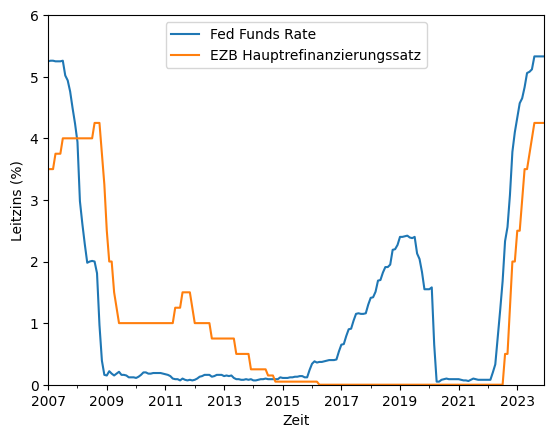

In [45]:
fed = pd.read_csv('fed.csv')
display(fed)
ezb = pd.read_csv('ezb.csv')
ezb.Monat = fed.Monat
display(ezb)


datum = pd.to_datetime(fed.Monat, format='%Y-%m-%d')

fed_s = pd.Series(fed.Zins.values, index=datum, name='FED')
ezb_s = pd.Series(ezb.Hauptrefinanzierungssatz.values, index=datum, name='FED')

ax = fed_s.plot(label='Fed Funds Rate')

# Zweiten Plot auf die gleiche Achse legen
ezb_s.plot(ax=ax, label='EZB Hauptrefinanzierungssatz')

# Achsen beschriften und Bereich setzen
ax.set_xlabel('Zeit')
ax.set_ylabel('Leitzins (%)')
ax.set_ylim(0, 6)

# Legende anzeigen
ax.legend()

plt.show()

28000.0
28000.0


C:\Users\emirh\AppData\Local\Temp\ipykernel_3616\230923154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['kaufpreis'] = a['kaufpreis'].astype(int)


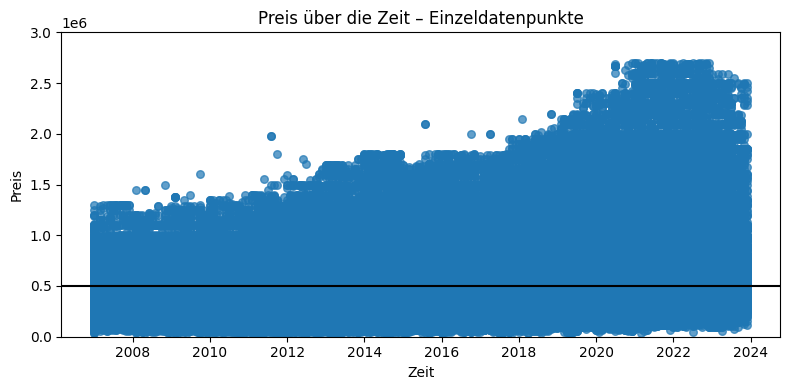

In [62]:
a = c_df[['adat','kaufpreis']]
print(a.kaufpreis.min())
print(a.kaufpreis.min())
a['kaufpreis'] = a['kaufpreis'].astype(int)
datum_a = pd.to_datetime(a.adat, format='%Y-%m-%d')
avg = a['kaufpreis'].mean()

plt.figure(figsize=(8,4))
plt.scatter(a['adat'], a['kaufpreis'], s=30, alpha=0.7)  # s=Größe,
plt.axhline(y=avg, label=f'Durchschnitt: {avg:,.0f}', color='black')
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.ylim(0, 3000000)
plt.title('Preis über die Zeit – Einzeldatenpunkte')
plt.tight_layout()
plt.show()